<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_18_Matplotlib Box Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\alexm\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 🟩 Data Scientist Hourly Salary Box Plot (2.18.1)

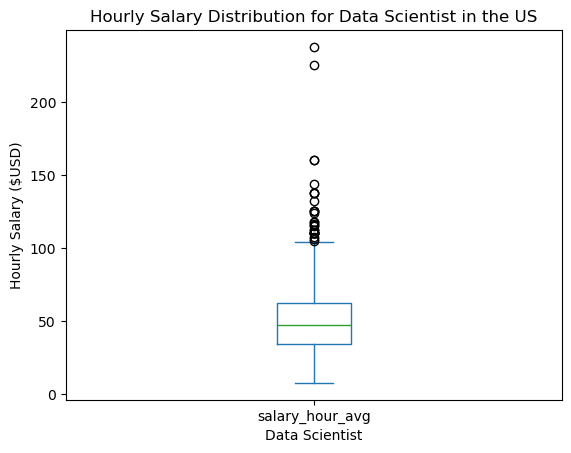

In [6]:
df_DS_US = df[
    (df['job_title_short'] == 'Data Scientist') &
    (df['job_country'] == 'United States')
].copy()

df_DS_US = df_DS_US.dropna(subset=['salary_hour_avg'])

# Filter out data
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_hour_avg'])

# Plot the boxplot
df_DS_US['salary_hour_avg'].plot(kind='box')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.show()

---

## 🟨 Comparison of Hourly Salaries for Data Analyst (2.18.2)

C:\Users\alexm\AppData\Local\Temp\ipykernel_10700\1895062917.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=countries, vert=False, patch_artist=True,


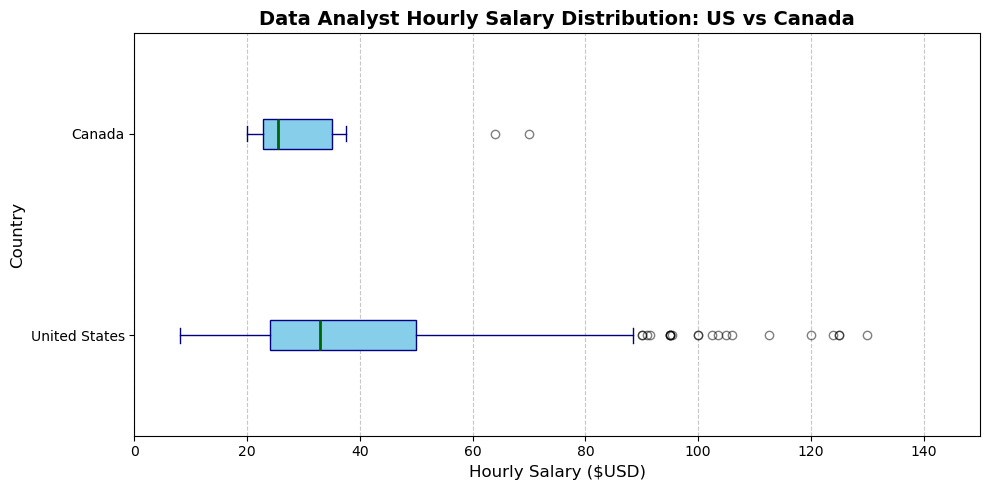

In [14]:
# Code Needed
countries = ['United States', 'Canada']

df_filter = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'].isin(countries))
].copy()

df_filter = df_filter.dropna(subset=['salary_hour_avg'])

job_list = [df_filter[df_filter['job_country'] == country]['salary_hour_avg'] for country in countries]
plt.figure(figsize=(10, 5))
plt.boxplot(job_list, labels=countries, vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='navy'),
            capprops=dict(color='navy'),
            whiskerprops=dict(color='navy'),
            flierprops=dict(marker='o', color='red', alpha=0.5),
            medianprops=dict(color='darkgreen', linewidth=2))

# Axis and titles
plt.xlim(0, 150)
plt.xlabel('Hourly Salary ($USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Data Analyst Hourly Salary Distribution: US vs Canada', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Optional: Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


---

## 🟥 Comparison of Hourly Salaries in Canada (2.18.3)

C:\Users\alexm\AppData\Local\Temp\ipykernel_10700\3224182978.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(job_list, patch_artist=True, labels=job_titles, vert=True)


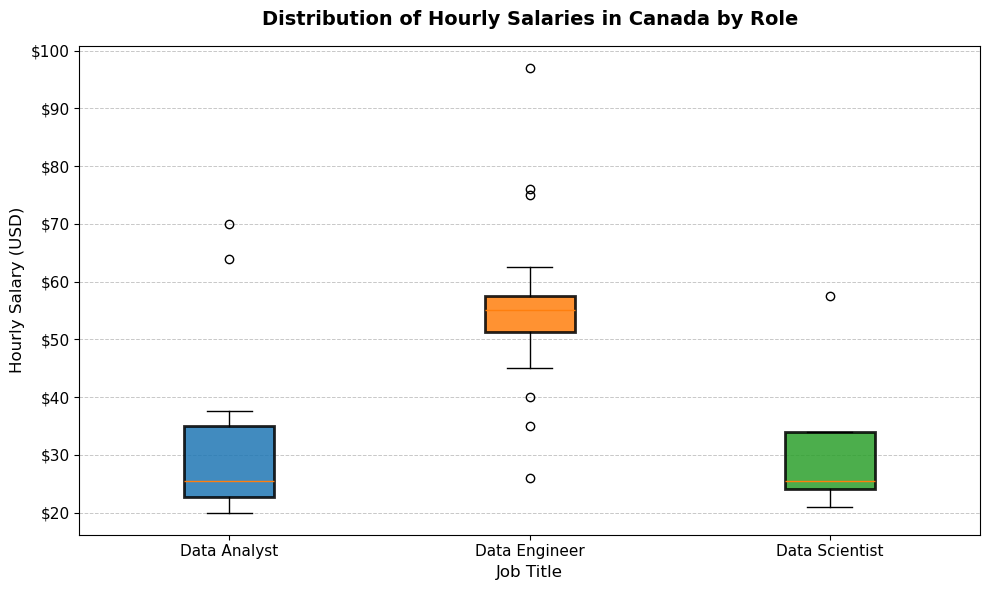

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_filtered = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].copy()

df_filtered = df_filtered.dropna(subset=['salary_hour_avg'])

job_list = [df_filtered[df_filtered['job_title_short'] == title]['salary_hour_avg'] for title in job_titles]

fig, ax = plt.subplots(figsize=(10, 6))
box = ax.boxplot(job_list, patch_artist=True, labels=job_titles, vert=True)

# Custom box colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_linewidth(2)
    patch.set_alpha(0.85)

# Add grid, labels, and formatting
ax.set_title('Distribution of Hourly Salaries in Canada by Role', fontsize=14, weight='bold', pad=15)
ax.set_xlabel('Job Title', fontsize=12)
ax.set_ylabel('Hourly Salary (USD)', fontsize=12)
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${int(x)}'))

# Make tick labels readable
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()



---